Importing Package

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Uploading tools

In [1]:
from google.colab import files
files.upload()

Saving loan_train.csv to loan_train.csv


{'loan_train.csv': b',Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender\n0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male\n2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female\n3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male\n4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female\n6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male\n7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male\n8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male\n9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male\n10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male\n11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male\n12,12,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male\n13,13,PAIDOFF,900,7,9/10/2016,9/16/2016,26,college,female\n14,14,PAIDOFF,1000,7,9/10/2016,9/16/2016,27,High School or Below,male\n15,15,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male\n16,16,PAIDOFF,1000,30,9/10/2016,10/9/2016,40,High S

Read Dataset

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Remove Unneccesary column

In [5]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)

In [6]:
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


Checking size of dataset

In [7]:
df.shape

(346, 8)

Converting date time object

In [9]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Data pre-processing

Checking the number of class in Dataset

In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Feature Selection and Data Visualization

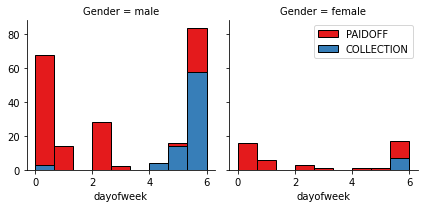

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

Convert Categorical features to numerical values

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

To get the numerical value, lets change the gender in 'male' and 'female' where male=0 and female =1

In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


Encoding on education

In [15]:
feature = df[['Principal','terms','age','Gender']]
feature = pd.concat([feature,pd.get_dummies(df['education'])], axis=1)
feature.drop(['Master or Above'], axis = 1,inplace=True)
feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [16]:
# x is feature data
x = feature
# y is label data
y= df['loan_status'].values


Normalize data

In [17]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [18]:
print(x)

[[ 0.51578458  0.92071769  2.33152555 ... -0.38170062  1.13639374
  -0.86968108]
 [ 0.51578458  0.92071769  0.34170148 ...  2.61985426 -0.87997669
  -0.86968108]
 [ 0.51578458 -0.95911111 -0.65321055 ... -0.38170062 -0.87997669
   1.14984679]
 ...
 [-1.31458942 -0.95911111  1.33661351 ... -0.38170062 -0.87997669
   1.14984679]
 [ 0.51578458  0.92071769 -0.48739188 ... -0.38170062 -0.87997669
   1.14984679]
 [ 0.51578458  0.92071769 -0.81902922 ... -0.38170062 -0.87997669
   1.14984679]]


Lets Build the Classification Model

**K Nearest Neighbor(KNN)**

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
print ('train set: ', x_train.shape,  y_train.shape)
print ('test set: ', x_test.shape,  y_test.shape)

train set:  (276, 7) (276,)
test set:  (70, 7) (70,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train the Model  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

In [21]:
#prediction
pred = kNN_model.predict(x_test)
pred

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [22]:
# Best k
kb=15
mean_acc=np.zeros((kb-1))
std_acc=np.zeros((kb-1))
ConfustionMx=[];
for n in range(1,kb):
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(x_train,y_train)
    p = kNN_model.predict(x_test)
    
    
    mean_acc[n-1]=np.mean(p==y_test);
    
    std_acc[n-1]=np.std(p==y_test)/np.sqrt(p.shape[0])
print(mean_acc)

[0.6        0.5        0.68571429 0.62857143 0.71428571 0.7
 0.75714286 0.74285714 0.74285714 0.74285714 0.74285714 0.74285714
 0.74285714 0.72857143]


In [23]:
#for building the model again using k =7
k = 7
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

**Decision Tree**

In [24]:
#Building the model
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
dTree.fit(x_train,y_train)
dTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
#predicting
pred = dTree.predict(x_test)
print(pred)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


**Support Vector Machine**

In [26]:
#building the model
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
#predicting
predic = svm_model.predict(x_test)
print(predic)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


**Logistic Regression**

In [28]:
#Building the model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01).fit(x_train,y_train)

In [29]:
#predicting
pr = lr_model.predict(x_test)
print(pr)

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


**Model Evaluation using Test set**

In [30]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Uploading test dataset

In [40]:
from google.colab import files
files.upload()

Saving loan_test.csv to loan_test (1).csv


{'loan_test.csv': b',Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender\n1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female\n5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male\n21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female\n24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male\n35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male\n37,37,PAIDOFF,700,15,9/11/2016,9/25/2016,33,High School or Below,male\n38,38,PAIDOFF,1000,15,9/11/2016,9/25/2016,24,college,male\n48,48,PAIDOFF,1000,30,9/11/2016,10/10/2016,32,Bechalor,male\n50,50,PAIDOFF,800,15,9/11/2016,9/25/2016,27,college,female\n61,61,PAIDOFF,1000,15,9/11/2016,9/25/2016,37,college,male\n64,64,PAIDOFF,800,15,9/11/2016,9/25/2016,24,High School or Below,male\n68,68,PAIDOFF,300,7,9/11/2016,9/17/2016,35,college,male\n76,76,PAIDOFF,1000,30,9/11/2016,10/10/2016,31,Bechalor,male\n78,78,PAIDOFF,1000,30,9/11/2016,10/10/2016,37,college,female\n84,84,PAIDOFF,1000,3

In [41]:
#Read Dataset
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [42]:
df_test= df_test.drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
df_test.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df_test.shape

(54, 8)

In [43]:
#Preprocessing
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = df_test[['Principal','terms','age','Gender']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_d['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_x = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_x[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211,  2.39791576,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -0.41702883,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -0.41702883,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -0.41702883,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  2.39791576,
        -0.79772404, -0.86135677]])

In [44]:
test_y = test_d['loan_status'].values
#test_X= test_X.reshape(1, -1)

In [45]:
knn_pred = kNN_model.predict(test_x)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(test_y, knn_pred))
print("KNN F1-score: %.2f" % f1_score(test_y, knn_pred, average='weighted') )

KNN Jaccard index: 0.74
KNN F1-score: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [46]:
dTree_pred = dTree.predict(test_x)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(test_y, dTree_pred))
print("DT F1-score: %.2f" % f1_score(test_y, dTree_pred, average='weighted') )

DT Jaccard index: 0.76
DT F1-score: 0.67


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [48]:
svm_m = svm_model.predict(test_x)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(test_y, svm_m))
print("SVM F1-score: %.2f" % f1_score(test_y, svm_m, average='weighted') )

SVM Jaccard index: 0.74
SVM F1-score: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [49]:
lr_m = lr_model.predict(test_x)
lr_model_prob = lr_model.predict_proba(test_x)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(test_y, lr_m))
print("LR F1-score: %.2f" % f1_score(test_y, lr_m, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, lr_model_prob))

LR Jaccard index: 0.74
LR F1-score: 0.63
LR LogLoss: 0.56


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


**Result**

In [53]:
#REPORT 
#                     Jaccard index    F1-score    LogLoass
#k-Nearest Neighbour       0.74            0.63        NA

#Decision Tree             0.76            0.67        NA 

#Support Vector Machine    0.74            0.63        NA

#Logistic Regression       0.74            0.63        0.56